*Reformatted* Omega Centauri Globular Cluster Orbital Plot using gala (an Astropy-affiliated Python package)

In [1]:
import astropy
import astropy.units as u

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Gala Imports
from gala.mpl_style import mpl_style
plt.style.use(mpl_style)
import gala.dynamics as gd
import astropy.coordinates as coord
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic

Omega Centauri (NGC 5139) parameters (from Vasiliev)

In [2]:
RA = 201.697
DEC = -47.480
D = 5.2
Vlos = 232.7
eVlos = 0.2
PMRA = -3.215
PMDEC = -6.761
ePMRA = 0.003
ePMDEC = 0.003
corrPM = -0.119
radius = 40.0
Nmember = 68783

In [3]:
potential = gp.MilkyWayPotential()
            
icrs = coord.SkyCoord(ra=coord.Angle(str(RA)+'d'), # d denotes degrees
                      dec=coord.Angle(str(DEC)+'d'), # d denotes degrees
                      distance=5.2*u.kpc,
                      pm_ra_cosdec=PMRA*u.mas/u.yr,
                      pm_dec=PMDEC*u.mas/u.yr,
                      radial_velocity=Vlos*u.km/u.s)

icrs_err = coord.SkyCoord(ra=0*u.deg, dec=0*u.deg, distance=0*u.kpc,
                          pm_ra_cosdec=ePMRA*u.mas/u.yr,
                          pm_dec=ePMDEC*u.mas/u.yr,
                          radial_velocity=eVlos*u.km/u.s)

gc_frame = coord.Galactocentric()

galcen = icrs.transform_to(gc_frame)

w0 = gd.PhaseSpacePosition(galcen.data)

n_steps = 10000, dt = 0.5: 5 Gyr into the future
    
(I will be integrating 5 Gyr backwards in time from the present)

In [4]:
orbit = potential.integrate_orbit(w0, dt=-0.5*u.Myr, n_steps=10000)

Calculated orbit for Omega Centauri aged 5 Gyr backward from the present day, shown in the Galactic Cartesian coordinate system with a 1:1 aspect ratio in both projections. The green dot marks the system’s current location.

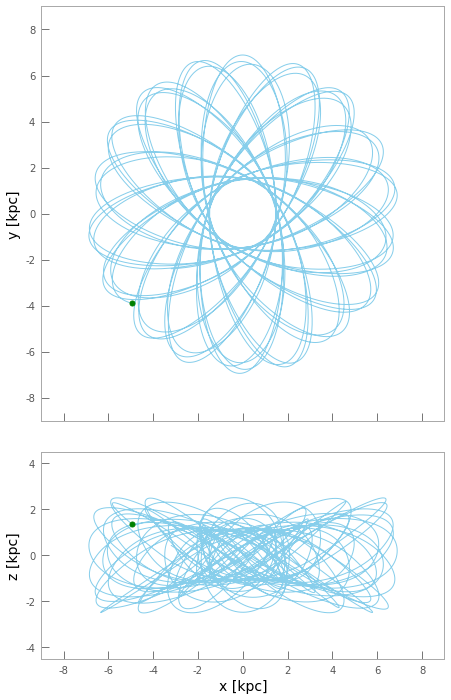

In [5]:
color = "skyblue"

fig, ax = plt.subplots(2, sharex='col', gridspec_kw={'width_ratios':[1], 
                        'height_ratios':[1,.5]}, figsize = (8,12))

fig.subplots_adjust(wspace=0.2, hspace=0.1, left = 0.2, right = None)

# xy scatter
# ax[0].set_xlabel('x [kpc]', fontsize = 12)
ax[0].set_ylabel('y [kpc]', fontsize = 14)
ax[0].plot(orbit.x, orbit.y, c=color, alpha=1, markersize = 0, lw=1);

# current xy coord
ax[0].plot(orbit.pos.x[0],orbit.pos.y[0],'go')
ax[0].yaxis.set_ticks_position('left')

# xz scatter
ax[1].set_xlabel('x [kpc]', fontsize = 14)
ax[1].set_ylabel('z [kpc]', fontsize = 14)
ax[1].plot(orbit.x, orbit.z, c=color, alpha=1, markersize = 0, lw=1);

# current xz coord
ax[1].plot(orbit.pos.x[0],orbit.pos.z[0],'go')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

plt.gcf().get_axes()[0].set_xbound(-9, 9)
plt.gcf().get_axes()[0].set_ybound(-9, 9)
plt.gcf().get_axes()[1].set_xbound(-9, 9)
plt.gcf().get_axes()[1].set_ybound(-4.5, 4.5)
plt.xticks(np.arange(-8,9,2))
plt.yticks(np.arange(-4,5,2))
bbox_inches = 'tight'